In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import os
if not os.getcwd().endswith("p-transformer-programs"):
    os.chdir("../..")

In [3]:
classifier_weights = pd.read_csv("programs/conll/conll_ner_weights.csv", index_col=[0, 1])

In [4]:
idx_t = classifier_weights.columns.to_numpy()

In [5]:
plt.rcParams["font.family"] = "monospace"

In [6]:
classifier_weights["B-LOC/B-ORG"] = classifier_weights["B-LOC"] - classifier_weights["B-ORG"]
top_weights = classifier_weights.sort_values(by="B-LOC/B-ORG")[["B-LOC", "B-ORG", "B-LOC/B-ORG"]]

In [24]:
def short_name(s):
    a, b = s.split(":")
    if "_" not in a:
        return ":".join([a[:-1], b])
    return ":".join([a[:a.rindex("_")], b.replace("Emb", "Var")])

def short_names(lst):
    return list(map(short_name, lst))

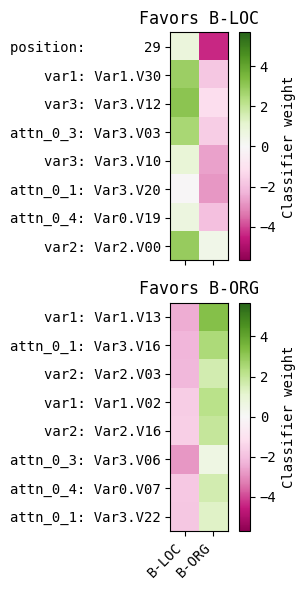

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(3, 6), sharex=True)
ds = [top_weights.tail(8).iloc[::-1], top_weights.head(8)]
w = np.concatenate(ds)
vmin = min(w.min(), -(w.max()))
vmax = max(w.max(), -(w.min()))
titles = ["Favors B-LOC", "Favors B-ORG"]
for d, ax, title in zip(ds, axes, titles):
    w = d.to_numpy()[:, :-1]
    ylabels = [f"{k}: {v:>8}" for k, v in d.index]
    xlabels = d.columns[:-1]
    im = ax.imshow(w, cmap="PiYG", vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.set_xticks(np.arange(len(xlabels)), labels=xlabels, rotation=45, ha="right")
    ax.set_yticks(np.arange(len(ylabels)), labels=short_names(ylabels))
    fig.colorbar(im, ax=ax, label="Classifier weight")
plt.tight_layout()
plt.savefig("figures/conll_features.pdf", dpi=150, bbox_inches="tight")
plt.show()